In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
from skimage.transform import resize
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import os

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, BatchNormalization, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.applications import VGG16, InceptionV3
from tensorflow.keras.callbacks import EarlyStopping


In [23]:
def pre_processing(observe):
    # rm_img = observe[20:195,:,:]
    rm_img = observe
    processed_observe = np.uint8(resize(rgb2gray(rm_img), (150, 150), mode='constant') * 255)
    return processed_observe

In [82]:
char_list = [chr(i) for i in range(ord('A'), ord('Z')+1)]
for i in char_list:
    path = './data/Img/char/train/upper/{}/'.format(i)
    org_path = './data/Img/char/org/train/upper/{}/'.format(i)
    file_list = os.listdir(org_path)
    for j in file_list:
        tmp = cv2.imread(org_path+j)
        tmp = pre_processing(tmp)
        cv2.imwrite(path+j, tmp)
    print('{} finish'.format(i))

A finish
B finish
C finish
D finish
E finish
F finish
G finish
H finish
I finish
J finish
K finish
L finish
M finish
N finish
O finish
P finish
Q finish
R finish
S finish
T finish
U finish
V finish
W finish
X finish
Y finish
Z finish


In [14]:
train_dir='./data/Img/char/train/upper/'
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20, shear_range=0.1,
    width_shift_range=0.1, height_shift_range=0.1,
    zoom_range=0.1, horizontal_flip=False, fill_mode='nearest')
# train_generator = train_datagen.flow_from_directory(train_dir, target_size=(84, 84)
#                     , color_mode='grayscale', batch_size=20, class_mode='categorical')
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150)
                    , batch_size=20, class_mode='categorical')

valid_dir='./data/Img/char/valid/upper/'
valid_datagen = ImageDataGenerator(rescale=1./255)
# train_generator = train_datagen.flow_from_directory(train_dir, target_size=(84, 84)
#                     , color_mode='grayscale', batch_size=20, class_mode='categorical')
valid_generator = valid_datagen.flow_from_directory(valid_dir, target_size=(150, 150)
                    , batch_size=20, class_mode='categorical')

Found 1300 images belonging to 26 classes.
Found 130 images belonging to 26 classes.


In [13]:
input_shape = train_generator[0][0].shape[1:]
output_shape = train_generator[0][1].shape[1]
model=Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(output_shape, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [93]:
input_shape = train_generator[0][0].shape[1:]
output_shape = train_generator[0][1].shape[1]
model2=Sequential()
model2.add(Conv2D(64, (5, 5), activation='relu', input_shape=input_shape))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(256, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(256, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
# model2.add(Dropout(0.5))
model2.add(Dense(512, activation='relu'))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(output_shape, activation='softmax'))
model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [94]:
# steps_per_epoch = len(X_train)//batch_size
steps_per_epoch = 1300//20
history2 = model2.fit_generator(
            train_generator,
            steps_per_epoch=steps_per_epoch,
            epochs=300,
            callbacks=[EarlyStopping(monitor='val_loss', patience=1)])

d:\Users\Pringles\anaconda3\envs\project\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/300
71/71 [==============================] - 5s 46ms/step - loss: 3.2711 - accuracy: 0.0496
Epoch 2/300
71/71 [==============================] - 3s 37ms/step - loss: 2.5349 - accuracy: 0.2106
Epoch 3/300
71/71 [==============================] - 3s 36ms/step - loss: 1.9842 - accuracy: 0.3624
Epoch 4/300
71/71 [==============================] - 3s 38ms/step - loss: 1.3291 - accuracy: 0.5660
Epoch 5/300
71/71 [==============================] - 3s 42ms/step - loss: 0.8958 - accuracy: 0.7128
Epoch 6/300
71/71 [==============================] - 3s 39ms/step - loss: 0.6619 - accuracy: 0.7957
Epoch 7/300
71/71 [==============================] - 4s 56ms/step - loss: 0.4799 - accuracy: 0.8582
Epoch 8/300
71/71 [==============================] - 3s 48ms/step - loss: 0.3906 - accuracy: 0.8816
Epoch 9/300
71/71 [==============================] - 4s 46ms/step - loss: 0.3899 - accuracy: 0.8787
Epoch 10/300
71/71 [==============================] - 3s 37ms/step - loss: 0.2956 - accuracy: 0.9177

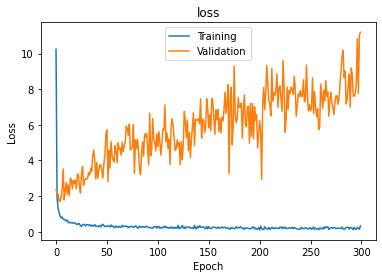

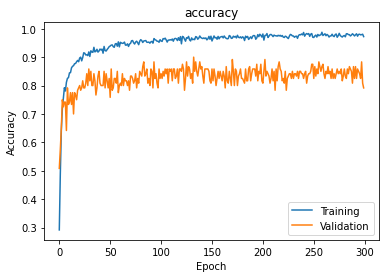

In [20]:
def plot_acc(h, title="accuracy"):
    plt.plot(h.history['accuracy'])
    plt.plot(h.history['val_accuracy'])
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc=0)
    # plt.legend(['Training'], loc=0)


def plot_loss(h, title="loss"):
    plt.plot(h.history['loss'])
    plt.plot(h.history['val_loss'])
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc=0)
    # plt.legend(['Training'], loc=0)


plot_loss(history3)
plt.show()
# plt.savefig('loss_graph.png')
# plt.clf()
plot_acc(history3)
# plt.savefig('acc_graph.png')
plt.show()

In [ ]:
# scores = model.evaluate_generator(
#             test_generator, 
#             steps = 5)

# print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

# 모델 예측하기
# print("-- Predict --")

# output = model.predict_generator(
#             test_generator, 
#             steps = 5)

# np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

# print(output)

In [77]:
# test = cv2.imread('./data/Img/char/train/upper/B/img012-005.png')
test = cv2.imread('./data/Img/char/test/c.png')
test = pre_processing(test)
test = test.reshape(1, 84, 84, 1)
pred = model2.predict(test)
print(train_generator.class_indices)
print(pred)
print(np.argmax(pred))
print(np.argmax(pred[[0]]))


{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25}
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1.]]
25
25


In [15]:
input_shape = train_generator[0][0].shape[1:]
output_shape = train_generator[0][1].shape[1]

model3 = Sequential()
conv_base = InceptionV3(weights='imagenet',
                    include_top=False,
                    input_shape=input_shape)
conv_base.trainable=False
model3.add(conv_base)
model3.add(Flatten())
model3.add(Dense(256, activation='relu'))
model3.add(Dense(output_shape, activation='softmax'))
model3.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# steps_per_epoch = len(X_train)//batch_size
# validation_steps = len(X_valid)//batch_size
steps_per_epoch = 1300//20
history3 = model3.fit(
            train_generator,
            steps_per_epoch=steps_per_epoch,
            epochs=300,
            # callbacks=[EarlyStopping(monitor='val_loss', patience=1)],
            validation_data = valid_generator,
            validation_steps = 130//20)

Epoch 1/300
65/65 [==============================] - 22s 197ms/step - loss: 10.2402 - accuracy: 0.2915 - val_loss: 2.3677 - val_accuracy: 0.5083
Epoch 2/300
65/65 [==============================] - 10s 157ms/step - loss: 1.9413 - accuracy: 0.4885 - val_loss: 2.1507 - val_accuracy: 0.5750
Epoch 3/300
65/65 [==============================] - 11s 166ms/step - loss: 1.3017 - accuracy: 0.6415 - val_loss: 2.1335 - val_accuracy: 0.6500
Epoch 4/300
65/65 [==============================] - 11s 164ms/step - loss: 1.0725 - accuracy: 0.7185 - val_loss: 1.7034 - val_accuracy: 0.7500
Epoch 5/300
65/65 [==============================] - 10s 160ms/step - loss: 0.8666 - accuracy: 0.7538 - val_loss: 1.6958 - val_accuracy: 0.7250
Epoch 6/300
65/65 [==============================] - 11s 164ms/step - loss: 0.7695 - accuracy: 0.7923 - val_loss: 1.9332 - val_accuracy: 0.7417
Epoch 7/300
65/65 [==============================] - 11s 162ms/step - loss: 0.8322 - accuracy: 0.7808 - val_loss: 2.3538 - val_accuracy

In [22]:
model3.save_weights('./model3(inceptionV3).h5')

In [18]:
# test = cv2.imread('./data/Img/char/train/upper/B/img012-005.png')
test = cv2.imread('./data/Img/char/test/b.png')
rm_img = test
test = np.uint8(resize(rm_img, (150, 150), mode='constant') * 255)
test = test.reshape(1, 150, 150, 3)
pred = model3.predict(test)
print(train_generator.class_indices)
print(pred)
print(np.argmax(pred))
print(np.argmax(pred[[0]]))


{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25}
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]
4
4


In [ ]:
############################################################ else

In [27]:
char_list = [chr(i) for i in range(ord('A'), ord('Z')+1)]
for i in char_list:
    # path = './data/else/char/train/upper/{}/'.format(i)
    # org_path = './data/else/char/org/train/upper/{}/'.format(i)
    path = './data/else/char/valid/upper/{}/'.format(i)
    org_path = './data/else/char/org/valid/upper/{}/'.format(i)
    file_list = os.listdir(org_path)
    for j in file_list:
        tmp = cv2.imread(org_path+j)
        try:
            tmp = pre_processing(tmp)
        except:
            print(org_path + j)
        cv2.imwrite(path+j, tmp)
    print('{} finish'.format(i))

A finish
B finish
C finish
D finish
E finish
F finish
G finish
H finish
I finish
J finish
K finish
L finish
M finish
N finish
O finish
P finish
Q finish
R finish
S finish
T finish
U finish
V finish
W finish
X finish
Y finish
Z finish


In [32]:
train_dir='./data/else/char/train/upper/'
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20, shear_range=0.1,
    width_shift_range=0.1, height_shift_range=0.1,
    zoom_range=0.1, horizontal_flip=False, fill_mode='nearest')
# train_generator = train_datagen.flow_from_directory(train_dir, target_size=(84, 84)
#                     , color_mode='grayscale', batch_size=20, class_mode='categorical')
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150)
                    , batch_size=64, class_mode='categorical')

valid_dir='./data/else/char/valid/upper/'
valid_datagen = ImageDataGenerator(rescale=1./255)
# train_generator = train_datagen.flow_from_directory(train_dir, target_size=(84, 84)
#                     , color_mode='grayscale', batch_size=20, class_mode='categorical')
valid_generator = valid_datagen.flow_from_directory(valid_dir, target_size=(150, 150)
                    , batch_size=64, class_mode='categorical')

Found 22127 images belonging to 26 classes.
Found 2340 images belonging to 26 classes.


In [33]:
input_shape = train_generator[0][0].shape[1:]
output_shape = train_generator[0][1].shape[1]

model4 = Sequential()
conv_base = InceptionV3(weights='imagenet',
                    include_top=False,
                    input_shape=input_shape)
conv_base.trainable=False
model4.add(conv_base)
model4.add(Flatten())
model4.add(Dense(512, activation='relu'))
model4.add(Dense(output_shape, activation='softmax'))
model4.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# steps_per_epoch = len(X_train)//batch_size
# validation_steps = len(X_valid)//batch_size
steps_per_epoch = 22127//64
history4 = model4.fit(
            train_generator,
            steps_per_epoch=steps_per_epoch,
            epochs=300,
            # callbacks=[EarlyStopping(monitor='val_loss', patience=1)],
            validation_data = valid_generator,
            validation_steps = 2340//64)

Epoch 1/300
128/345 [==========>...................] - ETA: 2:47 - loss: 5.7560 - accuracy: 0.5914

KeyboardInterrupt: 